# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# # Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | flying fish cove
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | pemangkat
Processing Record 5 of Set 1 | happy valley-goose bay
Processing Record 6 of Set 1 | kerikeri
Processing Record 7 of Set 1 | kapa'a
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | douentza
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | remire-montjoly
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | san patricio
Processing Record 18 of Set 1 | evinayong
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | puerto ayora
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-1.56,76,100,6.27,GL,1717032632
1,flying fish cove,-10.4217,105.6791,26.82,78,40,4.63,CX,1717032721
2,port-aux-francais,-49.3500,70.2167,2.47,70,98,16.63,TF,1717032904
3,pemangkat,1.1667,108.9667,29.03,72,85,2.85,ID,1717032904
4,happy valley-goose bay,53.3168,-60.3315,3.17,93,100,8.75,CA,1717032905


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.56,76,100,6.27,GL,1717032632
1,flying fish cove,-10.4217,105.6791,26.82,78,40,4.63,CX,1717032721
2,port-aux-francais,-49.3500,70.2167,2.47,70,98,16.63,TF,1717032904
3,pemangkat,1.1667,108.9667,29.03,72,85,2.85,ID,1717032904
4,happy valley-goose bay,53.3168,-60.3315,3.17,93,100,8.75,CA,1717032905


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black")

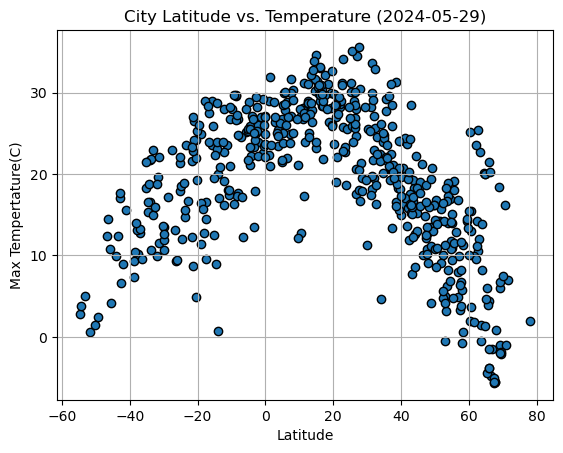

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Tempertature(C)')
plt.title('City Latitude vs. Temperature (2024-05-29)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

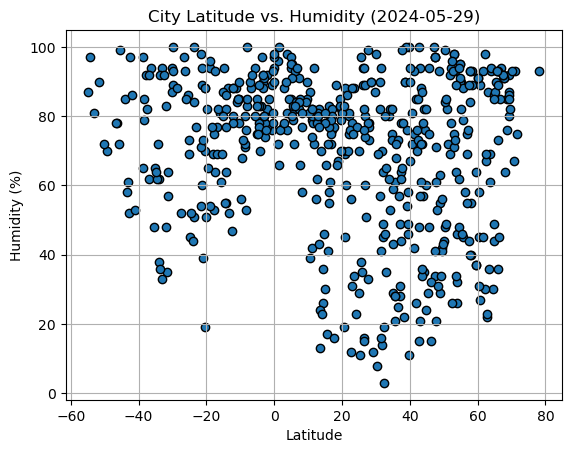

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2024-05-29)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

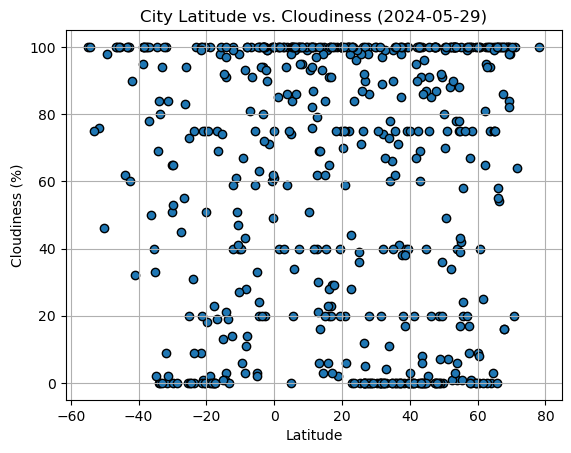

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2024-05-29)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

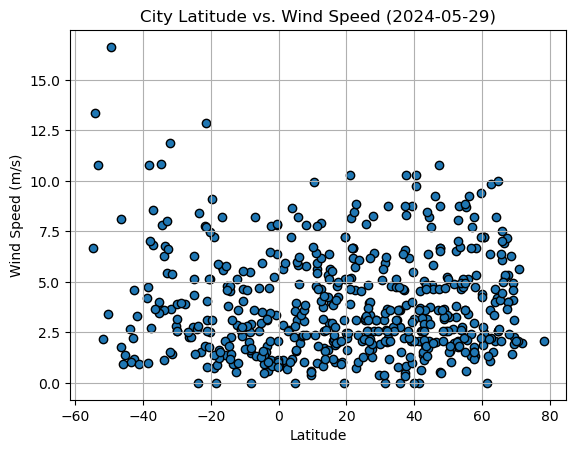

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2024-05-29)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    print(f"The r-value is: {r_value}")
    plt.scatter(x,y)
    plt.plot(x, line, color='red')
 
    line_equation = f"y = {slope:.2f}x +{intercept:.2f}"
    plt.text(0.5,0.9,line_equation,color='red',transform=plt.gca().transAxes)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.56,76,100,6.27,GL,1717032632
3,pemangkat,1.1667,108.9667,29.03,72,85,2.85,ID,1717032904
4,happy valley-goose bay,53.3168,-60.3315,3.17,93,100,8.75,CA,1717032905
6,kapa'a,22.0752,-159.3190,28.99,80,75,6.17,US,1717032664
9,douentza,14.9951,-2.9517,34.64,30,84,2.97,ML,1717032908


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,flying fish cove,-10.4217,105.6791,26.82,78,40,4.63,CX,1717032721
2,port-aux-francais,-49.3500,70.2167,2.47,70,98,16.63,TF,1717032904
5,kerikeri,-35.2268,173.9474,18.28,65,33,4.02,NZ,1717032906
7,puerto natales,-51.7236,-72.4875,0.54,90,76,2.17,CL,1717032712
8,port saint john's,-31.6229,29.5448,19.63,35,0,3.67,ZA,1717032907


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7879487487649156


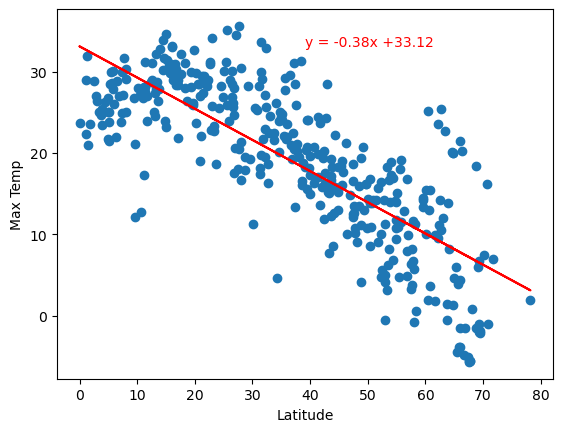

In [26]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.6988054637254442


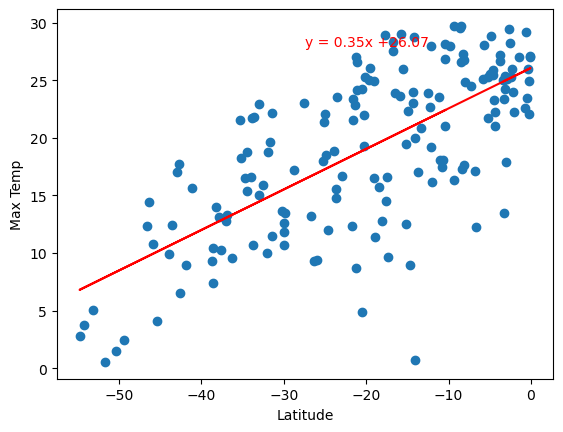

In [27]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.028769630502584333


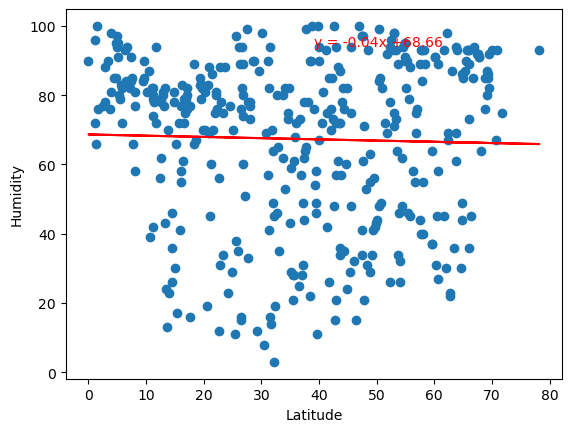

In [30]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.05689741545789598


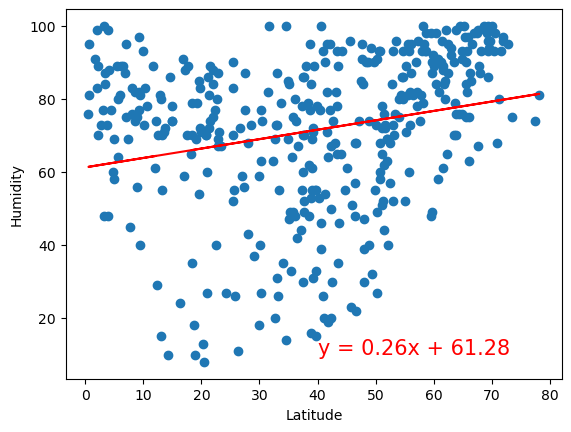

In [17]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.07095315260917906


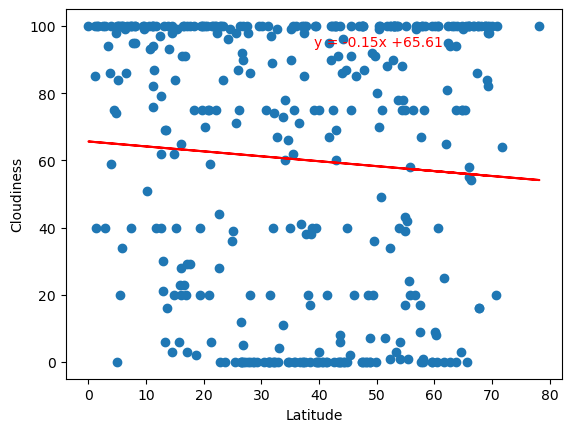

In [31]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: -0.06038316969709933


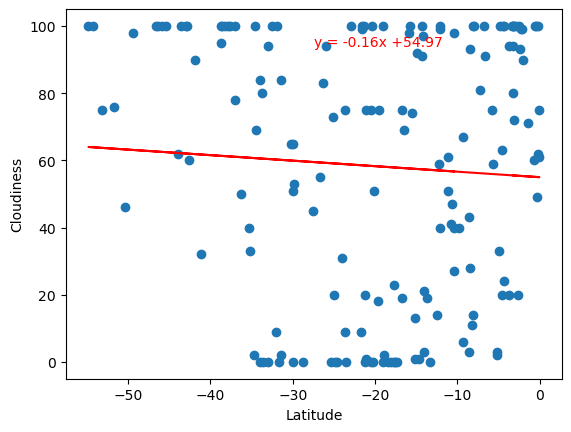

In [32]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07498756428437471


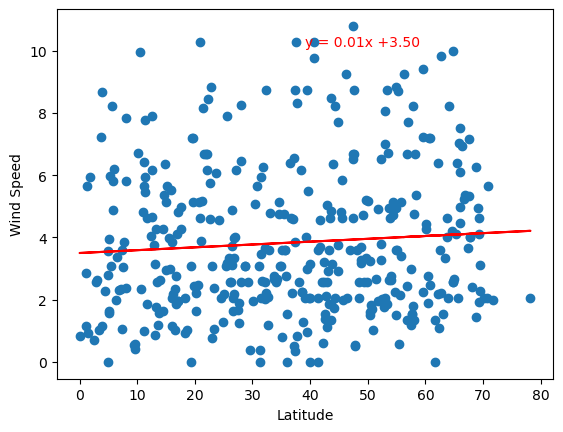

In [33]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.3022706170749459


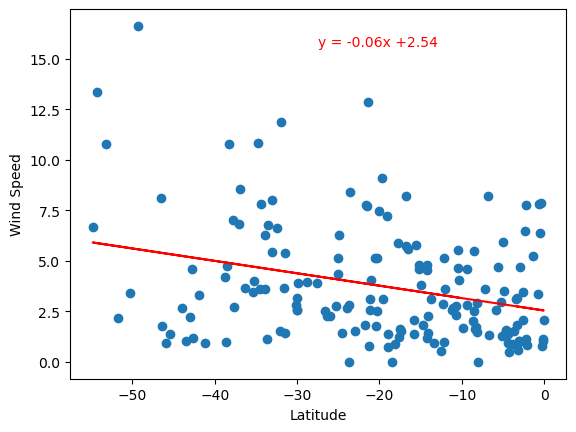

In [34]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE